<a href="https://colab.research.google.com/github/tintenderete/TFM-Algoritmo-con-redes-evolutivas/blob/main/modelo_fijo_datos_ibex35_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import to_categorical

# DATOS

In [2]:
symbols = [
"ANA.MC", "ACX.MC", "ACS.MC", "AENA.MC", "AMS.MC", "MTS.MC", "SAB.MC", "BKIA.MC", "BKT.MC", "BBVA.MC", "CABK.MC",
"CLNX.MC", "CIE.MC", "ENG.MC", "ELE.MC", "FER.MC", "GRF.MC", "IAG.MC", "IBE.MC", "ITX.MC", "IDR.MC", "COL.MC",
"MEL.MC", "MRL.MC", "NTGY.MC", "PHM.MC", "REE.MC", "REP.MC", "SGRE.MC", "SLR.MC", "TRE.MC", "TEF.MC", "VIS.MC",
"VWS.CO"
]

In [3]:
# Descargar datos
start_date = "2016-01-01"
end_date = "2023-01-01"

In [4]:
data = yf.download(symbols, start=start_date, end=end_date)

[*********************100%***********************]  34 of 34 completed

ERROR:yfinance:
3 Failed downloads:
ERROR:yfinance:['BKIA.MC', 'REE.MC', 'SGRE.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [5]:
adj_close = data['Adj Close']

In [6]:
adj_close.shape

(1797, 34)

In [7]:
adj_close.isna().sum()

ACS.MC        5
ACX.MC        5
AENA.MC       5
AMS.MC        5
ANA.MC        5
BBVA.MC       5
BKIA.MC    1797
BKT.MC        5
CABK.MC       5
CIE.MC        5
CLNX.MC       5
COL.MC        5
ELE.MC        5
ENG.MC        5
FER.MC        5
GRF.MC        5
IAG.MC        5
IBE.MC        5
IDR.MC        5
ITX.MC        5
MEL.MC        5
MRL.MC        5
MTS.MC        5
NTGY.MC       5
PHM.MC        5
REE.MC     1797
REP.MC        5
SAB.MC        5
SGRE.MC    1797
SLR.MC        5
TEF.MC        5
TRE.MC        5
VIS.MC        5
VWS.CO       45
dtype: int64

In [8]:
adj_close = adj_close.drop(["BKIA.MC", "REE.MC", "SGRE.MC"  ], axis = 1)

In [9]:
adj_close.isna().sum()

ACS.MC      5
ACX.MC      5
AENA.MC     5
AMS.MC      5
ANA.MC      5
BBVA.MC     5
BKT.MC      5
CABK.MC     5
CIE.MC      5
CLNX.MC     5
COL.MC      5
ELE.MC      5
ENG.MC      5
FER.MC      5
GRF.MC      5
IAG.MC      5
IBE.MC      5
IDR.MC      5
ITX.MC      5
MEL.MC      5
MRL.MC      5
MTS.MC      5
NTGY.MC     5
PHM.MC      5
REP.MC      5
SAB.MC      5
SLR.MC      5
TEF.MC      5
TRE.MC      5
VIS.MC      5
VWS.CO     45
dtype: int64

In [10]:
adj_close = adj_close.fillna(method="ffill")

In [11]:
adj_close.isna().sum().sum()

0

In [12]:
adj_close.shape

(1797, 31)

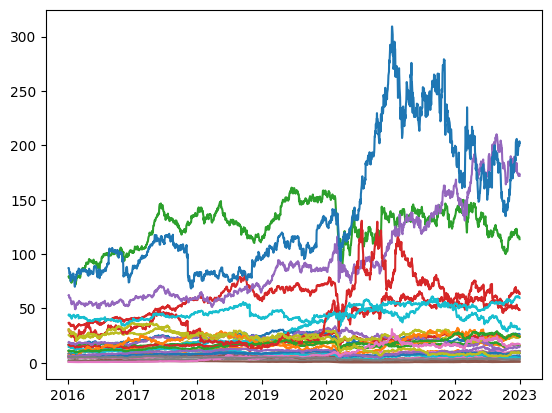

In [13]:
plt.plot(adj_close);

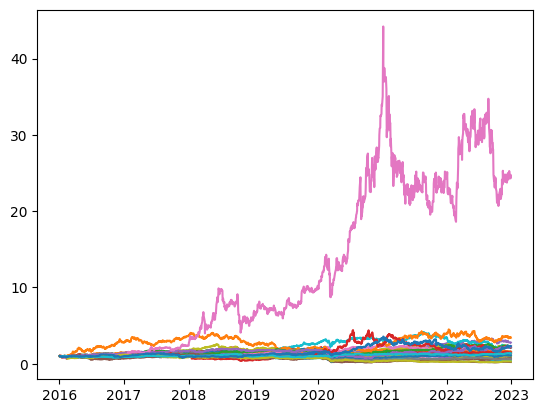

In [14]:
plt.plot(adj_close/adj_close.iloc[0]);

In [15]:
adj_close.iloc[500:560].shape

(60, 31)

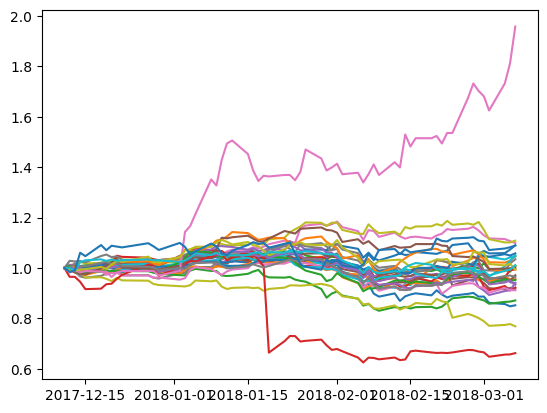

In [16]:
plt.plot(adj_close.iloc[500:560]/adj_close.iloc[500:560].iloc[0]);

In [17]:
adj_close.columns

Index(['ACS.MC', 'ACX.MC', 'AENA.MC', 'AMS.MC', 'ANA.MC', 'BBVA.MC', 'BKT.MC',
       'CABK.MC', 'CIE.MC', 'CLNX.MC', 'COL.MC', 'ELE.MC', 'ENG.MC', 'FER.MC',
       'GRF.MC', 'IAG.MC', 'IBE.MC', 'IDR.MC', 'ITX.MC', 'MEL.MC', 'MRL.MC',
       'MTS.MC', 'NTGY.MC', 'PHM.MC', 'REP.MC', 'SAB.MC', 'SLR.MC', 'TEF.MC',
       'TRE.MC', 'VIS.MC', 'VWS.CO'],
      dtype='object')

In [18]:
adj_close.iloc[0:2, [0,1,2,3,4,5,6,7,8,9]]

,ACS.MC,ACX.MC,AENA.MC,AMS.MC,ANA.MC,BBVA.MC,BKT.MC,CABK.MC,CIE.MC,CLNX.MC
Date,,,,,,,,,,
2016-01-04 00:00:00,16.762012,5.926919,79.277679,36.609074,62.069103,4.407446,4.751968,2.298497,10.778533,14.772964
2016-01-05 00:00:00,16.794477,6.070360,79.734390,36.779484,62.354916,4.436830,4.754171,2.279122,10.822527,14.747093


# def pesos_marko(datos_top, num_portfolios = 1000):

In [19]:
def pesos_marko(datos_top, num_portfolios = 1000):

  returns = datos_top.pct_change().dropna()
  cov_matrix = returns.cov()
  tickers = datos_top.columns
  # Número de simulaciones de cartera

  # Inicializar arrays para almacenar los resultados de las simulaciones
  portfolio_returns = np.zeros(num_portfolios)
  portfolio_volatilities = np.zeros(num_portfolios)
  portfolio_weights = np.zeros((num_portfolios, len(tickers)))

  # Realizar las simulaciones de cartera
  for i in range(num_portfolios):
      # Generar ponderaciones aleatorias y normalizarlas para que sumen 1
      weights = np.random.random(len(tickers))
      weights /= np.sum(weights)

      # Calcular el rendimiento y la volatilidad de la cartera
      portfolio_return = np.dot(weights, returns.mean()) * 252
      portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

      # Almacenar los resultados
      portfolio_returns[i] = portfolio_return
      portfolio_volatilities[i] = portfolio_volatility
      portfolio_weights[i, :] = weights

  # Supongamos una tasa libre de riesgo del ...
  risk_free_rate = 0.01

  # Calcular el índice de Sharpe para cada cartera simulada
  sharpe_ratios = (portfolio_returns - risk_free_rate) / portfolio_volatilities

  carteras_ordenadas = np.argsort(-sharpe_ratios)

  return portfolio_weights[carteras_ordenadas[0]]

# def calculate_sharpe_ratio(returns, risk_free_rate):

In [20]:
import numpy as np

def calculate_sharpe_ratio(returns, risk_free_rate):
    """
    Calcular el ratio de Sharpe

    Parámetros:
    returns (np.array): Array de rendimientos de la inversión
    risk_free_rate (float): Tasa de rendimiento sin riesgo

    Devuelve:
    sharpe_ratio (float): Ratio de Sharpe
    """

    # Calcular el rendimiento promedio
    avg_returns = np.mean(returns)

    # Calcular la desviación estándar de los rendimientos
    std_returns = np.std(returns)

    # Calcular el ratio de Sharpe
    sharpe_ratio = (avg_returns - risk_free_rate) / std_returns

    return sharpe_ratio


# def top_n_indices(arr, n):

In [21]:
import numpy as np

def top_n_indices(arr, n):
    """
    Devuelve los índices de los n mayores elementos en el array.

    Parámetros:
    arr (np.array): Array de entrada
    n (int): Número de índices a devolver

    Devuelve:
    top_indices (np.array): Índices de los n mayores elementos
    """
    # Ordenar los índices en función de los valores en 'arr'
    # 'argsort' devuelve los índices que ordenarían 'arr'
    # '-arr' se usa para ordenar en orden descendente
    sorted_indices = np.argsort(-arr)

    # Devolver los primeros 'n' índices
    top_indices = sorted_indices[:n]

    return top_indices


# def algo_sharpe(data, n_activos_top = 10):

In [22]:
def algo_sharpe(data, n_activos_top = 10):

  sharpe = calculate_sharpe_ratio(np.log(data / data.shift(1)).dropna(), 0.01)
  top = top_n_indices(sharpe, n_activos_top)

  return top

# def algo_random(n_activos_seleccionados, n_shape):

In [23]:
def algo_random(n_activos_seleccionados, n_shape):
  return np.random.choice(n_shape, size=n_activos_seleccionados, replace=False)

# def calcular_rendimiento(data, data_forward, activos_seleccionados):

In [24]:
def calcular_rendimiento(data, data_forward, activos_seleccionados):
  #data = datos_analisis[i-days_backward:i]
  #data_forward = datos_analisis[i:i+days_forward]

  # ALGO RANDOM
  #activos_seleccionados= algo_random(n_activos_seleccionados, data.shape[1])
  #print("activos_seleccionados")
  #print(activos_seleccionados)
  ## CALCULAMOS FRONTERA MARKO
  data_seleccion = data.iloc[:,activos_seleccionados]
  pesos =  pesos_marko(data_seleccion , num_portfolios=num_portfolios)
  #print("pesos")
  #print(pesos)
  ## SELECCIONAMOS RENDIMIENTOS FUTUROS DE ACTIVOS
  data_forward_seleccion= data_forward.iloc[:,activos_seleccionados]
  rendimiento_activos = data_forward_seleccion.iloc[[0,-1],:].pct_change().dropna()
  #print("rendimiento_activos")
  #print(rendimiento_activos)
  ## CALCULAMOS RENDIMIENTOS FUTUROS DE CARTERA
  return ( rendimiento_activos * pesos).sum(axis = 1)


In [25]:
adj_close.shape

(1797, 31)

In [26]:
adj_close[1797-500:1797].shape

(500, 31)

# softmax_by_asset

In [27]:
import tensorflow as tf
from keras import backend as K

def softmax_by_asset(x):
    e = K.exp(x - K.max(x, axis=-1, keepdims=True))
    s = K.sum(e, axis=-1, keepdims=True)
    return e / s

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
# INVERSION

import warnings
warnings.filterwarnings('ignore')

"""
datos_analisis = adj_close[1797-700:1797]

days_backward = 90
days_forward = 30

n_activos_seleccionados = 10
num_portfolios = 10000

rendimientos = {}
rendimientos["rendimiento_algo_random_1"] = []
rendimientos["rendimiento_algo_random_2"] = []
rendimientos["rendimiento_algo_sharpe_1"] = []
rendimientos["rendimiento_algo_sharpe_2"] = []

i = 0
n_i = 100


for i in range(days_backward, len(datos_analisis), days_forward):
  #print(i-90, i , i + days_forward )

  data = datos_analisis[i-days_backward:i]
  data_forward = datos_analisis[i:i+days_forward]

  # ALGO RANDOM
  activos_seleccionados= algo_random(n_activos_seleccionados, data.shape[1])
  rendimiento = calcular_rendimiento(data, data_forward, activos_seleccionados)
  ## GUARDAMOS RENDIMIENTO
  rendimientos["rendimiento_algo_random_1"].append(rendimiento)

  # ALGO RANDOM
  activos_seleccionados= algo_random(n_activos_seleccionados, data.shape[1])
  rendimiento = calcular_rendimiento(data, data_forward, activos_seleccionados)
  ## GUARDAMOS RENDIMIENTO
  rendimientos["rendimiento_algo_random_2"].append(rendimiento)

  ####

  # ALGO SHARPE
  activos_seleccionados= algo_sharpe(data, n_activos_top = n_activos_seleccionados)
  rendimiento = calcular_rendimiento(data, data_forward, activos_seleccionados)
  ## GUARDAMOS RENDIMIENTO
  rendimientos["rendimiento_algo_sharpe_1"].append(rendimiento)

  # ALGO SHARPE
  activos_seleccionados= algo_sharpe(data, n_activos_top = n_activos_seleccionados)
  rendimiento = calcular_rendimiento(data, data_forward, activos_seleccionados)
  ## GUARDAMOS RENDIMIENTO
  rendimientos["rendimiento_algo_sharpe_2"].append(rendimiento)


days = []
for i in range(days_backward, len(datos_analisis), days_forward):
  data = datos_analisis[i-days_backward:i]
  data_forward = datos_analisis[i:i+days_forward]
  days.append(data_forward.index[-1].date())
  break
days = np.array(days)


plt.plot(np.array(rendimientos["rendimiento_algo_random_1"]),   color = 'r');
plt.plot(np.array(rendimientos["rendimiento_algo_random_2"]),   color = 'r');
plt.plot(np.array(rendimientos["rendimiento_algo_sharpe_1"]),   color = 'b');
plt.plot(np.array(rendimientos["rendimiento_algo_sharpe_2"]),   color = 'b');
plt.xticks(np.arange(len(days)), days, rotation=45);
"""

'\ndatos_analisis = adj_close[1797-700:1797]\n\ndays_backward = 90\ndays_forward = 30\n\nn_activos_seleccionados = 10\nnum_portfolios = 10000\n\nrendimientos = {}\nrendimientos["rendimiento_algo_random_1"] = []\nrendimientos["rendimiento_algo_random_2"] = []\nrendimientos["rendimiento_algo_sharpe_1"] = []\nrendimientos["rendimiento_algo_sharpe_2"] = []\n\ni = 0\nn_i = 100\n\n\nfor i in range(days_backward, len(datos_analisis), days_forward):\n  #print(i-90, i , i + days_forward )\n\n  data = datos_analisis[i-days_backward:i]\n  data_forward = datos_analisis[i:i+days_forward]\n\n  # ALGO RANDOM\n  activos_seleccionados= algo_random(n_activos_seleccionados, data.shape[1])\n  rendimiento = calcular_rendimiento(data, data_forward, activos_seleccionados)\n  ## GUARDAMOS RENDIMIENTO\n  rendimientos["rendimiento_algo_random_1"].append(rendimiento)\n\n  # ALGO RANDOM\n  activos_seleccionados= algo_random(n_activos_seleccionados, data.shape[1])\n  rendimiento = calcular_rendimiento(data, data_f

# TO-DO visualizamos los retnornos de cada compra, pero NO el acumulado

# X_DATA y Y_DATA

In [30]:
adj_close.shape

(1797, 31)

In [31]:
datos_analisis = adj_close[0:1500]
datos_analisis.shape

(1500, 31)

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
datos_analisis.shape

(1500, 31)

In [34]:
t = datos_analisis / datos_analisis.iloc[0,:]

In [35]:
t.shape

(1500, 31)

In [36]:

days_backward = 150
days_forward = 30
days_steps = 1

X_DATA = []
X_DATA_NORM_ONE = []
X_DATA_TAB = []
Y_DATA = []

for i in range(days_backward, len(datos_analisis), days_steps):
  # retornos logaritmicos
  X_data = datos_analisis[i-days_backward:i]
  X_data = np.log(X_data).diff().dropna()
  X_DATA.append(X_data)
  #retornos normalizados
  X_data = datos_analisis[i-days_backward:i]
  X_data = X_data / X_data.iloc[0,:]
  X_DATA_NORM_ONE.append(X_data)
  # datos tabulares
  X_data = datos_analisis[i-days_backward:i]
  X_data =   pd.DataFrame(
      np.vstack(
          (X_data.max(),
           X_data.min(),
           X_data.mean(),
           X_data.std(),
           calculate_sharpe_ratio(X_data, 0),
           np.argsort(np.argsort(calculate_sharpe_ratio(X_data, 0))) )),

      ).T
  X_data = np.array(X_data)
  X_DATA_TAB.append(X_data)

  # y
  data_forward = datos_analisis[i:i+days_forward]

  rs = calculate_sharpe_ratio(np.log(data_forward).diff().dropna(), 0)
  Y_data = np.argsort(np.argsort(rs))
  #Y_data = Y_data / Y_data.max()
  Y_DATA.append(Y_data)

X_DATA = np.array(X_DATA)
X_DATA_NORM_ONE = np.array(X_DATA_NORM_ONE)
X_DATA_TAB = np.array(X_DATA_TAB)
Y_DATA = np.array(Y_DATA)


In [37]:
X_DATA_TAB.shape

(1350, 31, 6)

In [38]:
X_DATA_NORM_ONE.shape

(1350, 150, 31)

In [39]:
calculate_sharpe_ratio(datos_analisis, 0)

ACS.MC      5.689259
ACX.MC      5.417964
AENA.MC     6.267482
AMS.MC      4.615297
ANA.MC      3.115303
BBVA.MC     4.630903
BKT.MC      3.838172
CABK.MC     4.105304
CIE.MC      4.211651
CLNX.MC     1.922528
COL.MC      5.059435
ELE.MC      5.124951
ENG.MC     13.999412
FER.MC      4.904036
GRF.MC      6.429830
IAG.MC      2.455884
IBE.MC      3.221727
IDR.MC      4.993165
ITX.MC      9.589323
MEL.MC      3.201335
MRL.MC      6.180165
MTS.MC      3.004640
NTGY.MC     4.841766
PHM.MC      1.541451
REP.MC      4.666563
SAB.MC      2.401523
SLR.MC      1.046913
TEF.MC      4.236355
TRE.MC      2.766984
VIS.MC      7.614566
VWS.CO      2.153073
dtype: float64

In [40]:
np.argsort(np.argsort(calculate_sharpe_ratio(datos_analisis, 0)))

ACS.MC     24
ACX.MC     23
AENA.MC    26
AMS.MC     15
ANA.MC      8
BBVA.MC    16
BKT.MC     11
CABK.MC    12
CIE.MC     13
CLNX.MC     2
COL.MC     21
ELE.MC     22
ENG.MC     30
FER.MC     19
GRF.MC     27
IAG.MC      5
IBE.MC     10
IDR.MC     20
ITX.MC     29
MEL.MC      9
MRL.MC     25
MTS.MC      7
NTGY.MC    18
PHM.MC      1
REP.MC     17
SAB.MC      4
SLR.MC      0
TEF.MC     14
TRE.MC      6
VIS.MC     28
VWS.CO      3
dtype: int64

## ejemplo datos tabulares

In [41]:
pd.DataFrame(
    np.vstack( (datos_analisis.max(), datos_analisis.min(), datos_analisis.mean(), datos_analisis.std(), calculate_sharpe_ratio(datos_analisis, 0), np.argsort(np.argsort(calculate_sharpe_ratio(datos_analisis, 0))) )),
    columns = datos_analisis.columns,
    index=["max", "min", "mean", "std", "sharpe", "ranking"]
    ).T

,max,min,mean,std,sharpe,ranking
ACS.MC,30.467091,8.982970,22.330937,3.926413,5.689259,24.0
ACX.MC,11.242288,4.524661,7.645613,1.411630,5.417964,23.0
AENA.MC,161.127655,71.604904,124.556387,19.880063,6.267482,26.0
AMS.MC,80.016983,30.632214,54.943837,11.908694,4.615297,15.0
ANA.MC,163.049606,49.215446,79.878777,25.649324,3.115303,8.0
BBVA.MC,5.832595,1.868374,4.151727,0.896825,4.630903,16.0
BKT.MC,7.315498,1.990775,4.984734,1.299159,3.838172,11.0
CABK.MC,3.493727,1.344590,2.391103,0.582636,4.105304,12.0
CIE.MC,27.618170,8.908789,17.924800,4.257422,4.211651,13.0
CLNX.MC,60.987103,10.904670,28.289612,14.719704,1.922528,2.0


In [42]:
X_DATA.shape, Y_DATA.shape

((1350, 149, 31), (1350, 31))

In [43]:
datos_analisis = adj_close[1500:]

In [44]:
datos_analisis.shape

(297, 31)

In [45]:
days_backward = 150
days_forward = 30
days_steps = 1

X_DATA_TEST = []
X_DATA_NORM_ONE_TEST = []
X_DATA_TAB_TEST = []
Y_DATA_TEST = []

for i in range(days_backward, len(datos_analisis), days_steps):

  X_data = datos_analisis[i-days_backward:i]
  X_data = np.log(X_data).diff().dropna()
  X_DATA_TEST.append(X_data)
  #retornos normalizados
  X_data = datos_analisis[i-days_backward:i]
  X_data = X_data / X_data.iloc[0,:]
  X_DATA_NORM_ONE_TEST.append(X_data)
  # datos tabulares
  X_data = datos_analisis[i-days_backward:i]
  X_data =   pd.DataFrame(
      np.vstack(
          (X_data.max(),
           X_data.min(),
           X_data.mean(),
           X_data.std(),
           calculate_sharpe_ratio(X_data, 0),
           np.argsort(np.argsort(calculate_sharpe_ratio(X_data, 0))) )),

      ).T
  X_data = np.array(X_data)
  X_DATA_TAB_TEST.append(X_data)

  # Y

  data_forward = datos_analisis[i:i+days_forward]

  rs = calculate_sharpe_ratio(np.log(data_forward).diff().dropna(), 0)
  Y_data = np.argsort(np.argsort(rs))
  #Y_data = Y_data / Y_data.max()
  Y_DATA_TEST.append(Y_data)

X_DATA_TEST = np.array(X_DATA_TEST)
X_DATA_NORM_ONE_TEST = np.array(X_DATA_NORM_ONE_TEST)
X_DATA_TAB_TEST = np.array(X_DATA_TAB_TEST)
Y_DATA_TEST = np.array(Y_DATA_TEST)

In [46]:
X_DATA_TAB.shape

(1350, 31, 6)

In [47]:
X_DATA.shape, Y_DATA.shape

((1350, 149, 31), (1350, 31))

In [48]:
X_DATA_TEST.shape, Y_DATA_TEST.shape

((147, 149, 31), (147, 31))

In [49]:
Y_DATA[0:2]

array([[17,  2, 12, 24, 15, 26, 23, 29, 11, 10,  0,  8,  3, 13,  6, 16,
         7, 21, 14, 19,  5,  1,  9, 20, 25, 18, 28, 22, 30,  4, 27],
       [17,  2, 13, 25, 15, 23, 21, 26, 11,  9,  5,  8,  1, 16,  7, 18,
         6, 28, 14, 19,  3,  0, 10, 24, 20, 12, 29, 22, 30,  4, 27]])

In [50]:
(Y_DATA[0:2] < 10).astype(int)

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [51]:
Y_DATA_CATEGORICAL_SIMPLE = to_categorical((Y_DATA < 10).astype(int))

In [52]:
Y_DATA_CATEGORICAL_SIMPLE.shape

(1350, 31, 2)

In [53]:
Y_DATA_CATEGORICAL_SIMPLE[0]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [54]:
Y_DATA_CATEGORICAL = to_categorical(Y_DATA)

In [55]:
X_DATA.shape, Y_DATA.shape

((1350, 149, 31), (1350, 31))

In [56]:
pd.DataFrame(X_DATA[0])

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.001935,0.023913,0.005744,0.004644,0.004594,0.006645,0.000464,-0.008465,0.004073,-0.001753,...,0.058618,0.012138,0.038173,-0.008886,-0.003065,0.062304,0.005125,-0.014029,0.009870,0.000000
1,-0.007761,-0.045178,-0.005264,0.002501,-0.002677,-0.021605,-0.022353,-0.036228,-0.024692,-0.011765,...,-0.066971,-0.007535,-0.028492,-0.028999,-0.009871,-0.034133,-0.007243,-0.033673,-0.009870,-0.011642
2,-0.028048,-0.048484,-0.017914,-0.025170,-0.037461,-0.012847,-0.014650,-0.025795,-0.034980,0.001774,...,-0.054774,-0.008954,-0.001929,-0.040452,-0.023840,-0.028171,-0.007704,-0.003660,-0.005425,-0.022391
3,-0.015748,0.007801,0.009239,-0.014580,-0.000663,-0.022848,-0.012429,-0.012473,-0.016679,-0.025121,...,-0.036674,-0.011337,-0.047440,-0.040925,-0.033573,0.000000,-0.024306,-0.027098,-0.018668,-0.022681
4,-0.003465,-0.021453,-0.004852,0.009057,-0.005319,-0.001755,-0.000488,-0.002377,0.002921,-0.006990,...,-0.008635,0.013442,-0.049803,-0.021852,0.009801,-0.007168,-0.013012,-0.011842,0.015945,-0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.011194,-0.015825,0.001177,0.004106,0.005963,0.017963,0.005445,0.016731,0.014975,0.007550,...,0.010471,0.004897,0.051736,0.009054,0.019868,-0.007273,0.024767,0.027189,0.009481,0.009569
145,-0.012722,0.034404,-0.005505,-0.009357,-0.022437,-0.036254,-0.021472,-0.036534,0.028138,-0.003139,...,-0.000365,0.007300,-0.027691,-0.035827,-0.022380,-0.022141,-0.046265,-0.017982,0.001347,0.011193
146,-0.019879,0.023272,0.017201,0.051425,-0.020375,0.036446,0.018112,0.044128,0.004038,-0.004727,...,0.050617,-0.002968,-0.006501,0.003109,0.024836,-0.015038,0.002855,0.013653,-0.083172,-0.006011
147,-0.008418,-0.016871,-0.001163,0.018053,-0.030426,-0.038035,-0.006431,-0.012990,0.006885,0.001893,...,0.001389,-0.005962,-0.013129,-0.014742,-0.029878,-0.015268,0.002051,0.011505,-0.008289,-0.004316


In [57]:
import tensorflow as tf

In [58]:
def loss_ranking(y_true, y_pred, weights = 1):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    diff = tf.abs(y_true - y_pred)
    loss = tf.reduce_mean(weights * diff)
    return loss


In [59]:
def loss_ranking(ranking_real, ranking_predicho):
    ranking_real_float = tf.cast(ranking_real, tf.float32)
    ranking_predicho = tf.cast(ranking_predicho, tf.float32)
    diferencias = tf.abs(ranking_real_float - ranking_predicho)
    diferencias_ponderadas = diferencias / (ranking_predicho + 0.01) # <<<<---------
    perdida_total = tf.reduce_sum(diferencias_ponderadas)
    return abs(perdida_total)

# funcion de coste personalizada

In [60]:

from keras import backend as K
import tensorflow as tf
hp_top = 10
hp_incremento_top = 2
def top_is_target(y_true, y_pred):
  num_samples = K.shape(y_true)[0]

  w = K.arange(31, dtype='float32')
  w = K.reverse(w, axes=0) + 1

  w = tf.where(K.arange(31) < hp_top, w * hp_incremento_top, w)
  # Replicar w a lo largo del eje 0 (batch)
  #w = K.repeat_elements(K.expand_dims(w, 0), num_samples, axis=0)
  w = tf.tile(K.expand_dims(w, 0), [num_samples, 1])

  # Calcular la pérdida
  r = K.cast(y_true, 'float32')
  r_pred = K.cast(y_pred, 'float32')

  return K.sum(w * K.square(r - r_pred), axis=-1)


In [61]:
K.arange(35, dtype='float32')

<tf.Tensor: shape=(35,), dtype=float32, numpy=
array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34.], dtype=float32)>

In [62]:
tf.range(10, dtype='float32')

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)>

# Y discreta 2 (GRU)

## prueba norm

In [63]:
X_DATA.shape, Y_DATA.shape

((1350, 149, 31), (1350, 31))

In [64]:
Y_DATA[0]

array([17,  2, 12, 24, 15, 26, 23, 29, 11, 10,  0,  8,  3, 13,  6, 16,  7,
       21, 14, 19,  5,  1,  9, 20, 25, 18, 28, 22, 30,  4, 27])

In [65]:
ej_norm = 2*(Y_DATA[0] - min(Y_DATA[0])) / (max(Y_DATA[0]) - min(Y_DATA[0])) - 1
ej_norm

array([ 0.13333333, -0.86666667, -0.2       ,  0.6       ,  0.        ,
        0.73333333,  0.53333333,  0.93333333, -0.26666667, -0.33333333,
       -1.        , -0.46666667, -0.8       , -0.13333333, -0.6       ,
        0.06666667, -0.53333333,  0.4       , -0.06666667,  0.26666667,
       -0.66666667, -0.93333333, -0.4       ,  0.33333333,  0.66666667,
        0.2       ,  0.86666667,  0.46666667,  1.        , -0.73333333,
        0.8       ])

In [66]:
np.argsort(ej_norm)

array([10, 21,  1, 12, 29, 20, 14, 16, 11, 22,  9,  8,  2, 13, 18,  4, 15,
        0, 25, 19, 23, 17, 27,  6,  3, 24,  5, 30, 26,  7, 28])

In [67]:
np.argsort(np.argsort(ej_norm))

array([17,  2, 12, 24, 15, 26, 23, 29, 11, 10,  0,  8,  3, 13,  6, 16,  7,
       21, 14, 19,  5,  1,  9, 20, 25, 18, 28, 22, 30,  4, 27])

## calculo norm

In [68]:
Y_DATA.shape

(1350, 31)

In [69]:
r_min = np.min(Y_DATA, axis=1)[:, np.newaxis]
r_max = np.max(Y_DATA, axis=1)[:, np.newaxis]
r_min, r_max

(array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]),
 array([[30],
        [30],
        [30],
        ...,
        [30],
        [30],
        [30]]))

In [70]:
Y_DATA_NORM = 2 * (Y_DATA - 0) / (30 - 0) - 1

In [71]:
Y_DATA_NORM[0] == ej_norm

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [72]:
Y_DATA_TEST_NORM = 2 * (Y_DATA_TEST - 0) / (30 - 0) - 1

In [73]:
X_DATA[0].shape

(149, 31)

In [81]:

import keras
from tensorflow.keras.layers import ConvLSTM1D, Dense, Conv2D, LSTM, GRU, Reshape, Dropout
from tensorflow.keras.layers import ConvLSTM2D, Conv3D, TimeDistributed, Flatten, BatchNormalization
from keras import regularizers

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout

inputs = keras.Input(shape=(X_DATA.shape[1:]))
m = inputs
#mA = Dense(units=25, activation = 'tanh')(m)

#mA = Dropout(0.9)(mA)

mA = GRU(units=1, kernel_regularizer=regularizers.l1_l2(l1=0.1, l2=0.1))(m)

mA = Dropout(0.1)(mA)

#mA = BatchNormalization()(mA)

mA = Dense(units=1, activation = 'relu')(mA)

m = Flatten()(mA)

# Añadir capa Dense de salida
out = Dense(Y_DATA.shape[1], activation='tanh')(m)

model_GRU = keras.Model(inputs=inputs, outputs=out)

# Compilar el modelo
model_GRU.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=top_is_target,
        metrics=[])

model_GRU.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 149, 31)]         0         
                                                                 
 gru_5 (GRU)                 (None, 1)                 102       
                                                                 
 dropout_3 (Dropout)         (None, 1)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 flatten_3 (Flatten)         (None, 1)                 0         
                                                                 
 dense_4 (Dense)             (None, 31)                62        
                                                                 
Total params: 166
Trainable params: 166
Non-trainable param

In [ ]:
X_DATA.shape

(1350, 149, 31)

In [78]:
from keras.callbacks import EarlyStopping

In [82]:
early_stop = EarlyStopping(monitor='val_loss', patience=1000, mode='min', restore_best_weights=True)
h = model_GRU.fit(X_DATA[0:1000],Y_DATA_NORM[0:1000],
          epochs=400,
          batch_size=X_DATA.shape[0],
          #batch_size=30,
          validation_data = (X_DATA[1000:], Y_DATA_NORM[1000:]),
          callbacks=[early_stop]
          )

Epoch 1/400
1/1 [==============================] - 2s 2s/step - loss: 263.9268 - val_loss: 260.1295
Epoch 2/400
1/1 [==============================] - 0s 51ms/step - loss: 262.3155 - val_loss: 261.3264
Epoch 3/400
1/1 [==============================] - 0s 66ms/step - loss: 260.8003 - val_loss: 262.7598
Epoch 4/400
1/1 [==============================] - 0s 66ms/step - loss: 259.4562 - val_loss: 264.3635
Epoch 5/400
1/1 [==============================] - 0s 50ms/step - loss: 258.4139 - val_loss: 265.9451
Epoch 6/400
1/1 [==============================] - 0s 58ms/step - loss: 257.3358 - val_loss: 267.4483
Epoch 7/400
1/1 [==============================] - 0s 51ms/step - loss: 256.6291 - val_loss: 268.7431
Epoch 8/400
1/1 [==============================] - 0s 53ms/step - loss: 255.9426 - val_loss: 269.8632
Epoch 9/400
1/1 [==============================] - 0s 54ms/step - loss: 255.3505 - val_loss: 270.8598
Epoch 10/400
1/1 [==============================] - 0s 49ms/step - loss: 254.8241 - 

In [ ]:
(209.1381 - 191.0137 ) / 191.0137  * 100

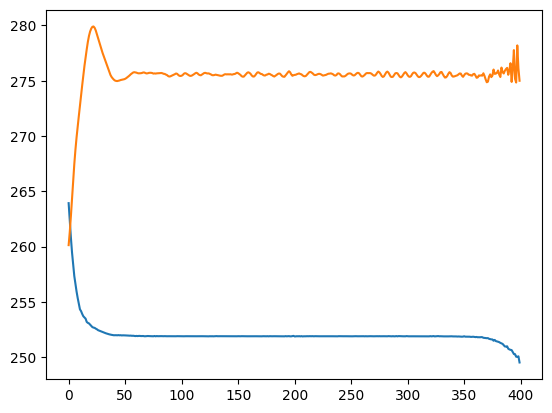

In [83]:
plt.plot(h.history["loss"])
plt.plot(h.history["val_loss"])

In [ ]:
plt.plot(h.history["loss"][-50:])
plt.plot(h.history["val_loss"][-50:])

In [ ]:
import tensorflow as tf


In [ ]:
p_test = model_GRU(X_DATA_TEST)

In [ ]:
top_is_target(Y_DATA_TEST_NORM, p_test)

<tf.Tensor: shape=(147,), dtype=float32, numpy=
array([204.20673, 186.34106, 208.12389, 208.48422, 186.97917, 199.63422,
       240.54166, 224.9988 , 220.9115 , 210.20699, 195.3571 , 200.69511,
       188.01857, 178.33093, 193.63304, 185.45512, 167.5977 , 182.44917,
       190.26678, 216.7046 , 233.65665, 225.45074, 215.4205 , 235.16199,
       203.42998, 257.61023, 290.26318, 234.73404, 238.49858, 261.52997,
       266.09427, 264.9662 , 332.88864, 321.41718, 313.82526, 329.13403,
       350.96457, 310.29236, 341.45288, 349.49368, 371.76978, 357.03302,
       339.2388 , 371.5101 , 352.11578, 336.48218, 334.5555 , 345.63336,
       368.73273, 351.11426, 346.74295, 363.3107 , 366.55994, 379.32117,
       364.90152, 371.16013, 328.4115 , 336.86078, 341.0115 , 320.88632,
       322.7426 , 325.46768, 341.0708 , 372.6914 , 351.06348, 367.2254 ,
       336.18298, 339.51636, 363.39523, 364.99078, 346.6848 , 323.52386,
       328.49   , 313.96896, 302.32092, 301.0503 , 285.13425, 280.99603,
   

In [ ]:
Y_DATA_TEST[0]

In [ ]:
np.argsort(np.argsort(Y_DATA_TEST_NORM[0]))

array([ 5,  0, 13, 21, 23,  8, 11, 12, 26, 22,  7, 10,  9, 28, 14, 20, 17,
       18, 29,  4, 19,  3, 25, 24,  1,  6, 15, 27,  2, 30, 16])

In [ ]:
np.argsort(np.argsort(p_test[0]))

array([17,  9, 20, 24, 23,  7,  6, 10, 18, 29, 25, 27, 14, 26, 15, 11, 28,
        5,  4,  0, 16,  8, 21, 13, 12,  3, 30,  2,  1, 19, 22])

In [ ]:
np.where(np.argsort(np.argsort(Y_DATA_TEST_NORM[0])) < 10)

(array([ 0,  1,  5, 10, 12, 19, 21, 24, 25, 28]),)

In [ ]:
np.where(np.argsort(np.argsort(p_test[0])) < 10)

(array([ 1,  5,  6, 17, 18, 19, 21, 25, 27, 28]),)

In [ ]:
Y_DATA_TEST_NORM.shape

In [ ]:
Y_DATA_NORM.shape

In [ ]:
p_train = m(X_DATA)
np.mean(tf.keras.metrics.mean_squared_error(
   Y_DATA_NORM, p_train ))



In [ ]:
Y_DATA_TEST_NORM[1]

In [ ]:
p_test[1]

In [ ]:
ranking_pred = np.argsort(np.argsort(p_test[0]))
ranking_pred



array([17,  9, 20, 24, 23,  7,  6, 10, 18, 29, 25, 27, 14, 26, 15, 11, 28,
        5,  4,  0, 16,  8, 21, 13, 12,  3, 30,  2,  1, 19, 22])

In [ ]:
ranking_real = Y_DATA_TEST[0]
ranking_real



array([ 5,  0, 13, 21, 23,  8, 11, 12, 26, 22,  7, 10,  9, 28, 14, 20, 17,
       18, 29,  4, 19,  3, 25, 24,  1,  6, 15, 27,  2, 30, 16])

In [ ]:
idx_activos_cartera_real = np.where(ranking_real < 10)
idx_activos_cartera_real



(array([ 0,  1,  5, 10, 12, 19, 21, 24, 25, 28]),)

In [ ]:
idx_activos_cartera_pred = np.where(ranking_pred < 10)
idx_activos_cartera_pred

(array([ 1,  5,  6, 17, 18, 19, 21, 25, 27, 28]),)

# X_DATA NORMALIZADO (CONV2D)

In [ ]:
X_DATA_NORM_ONE.shape

In [ ]:
import keras
from tensorflow.keras.layers import ConvLSTM1D, Dense, Conv2D, LSTM, GRU, Reshape, Dropout
from tensorflow.keras.layers import ConvLSTM2D, Conv3D, TimeDistributed, Flatten
from keras import regularizers

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout

inputs = keras.Input(shape=(X_DATA_NORM_ONE.shape[1],X_DATA_NORM_ONE.shape[2],1))
m = inputs
#m = Conv2D(filters=1, kernel_size=(3, 3), activation='relu')(m) # loss: 1.3978 - val_loss: 1.4160
m = Conv2D(filters=1, kernel_size=(5, 5), activation='relu')(m) # loss: 1.3978 - val_loss: 1.4160
#m = Conv2D(filters=2, kernel_size=(3, 3), activation='relu')(m) # loss: 0.3385 - val_loss: 0.3778
#m = Conv2D(filters=2, kernel_size=(5, 5), activation='relu')(m) #loss: 0.3385 - val_loss: 0.3778
#m = Conv2D(filters=2, kernel_size=(9, 9), activation='relu')(m) #loss: 0.3385 - val_loss: 0.3778

m = Dropout(0.1)(m)

m = Dense(units=1, activation = 'relu')(m)

m = Flatten()(m)

# Añadir capa Dense de salida
out = Dense(Y_DATA.shape[1], activation='tanh')(m)

model_CONV = keras.Model(inputs=inputs, outputs=out)

# Compilar el modelo
model_CONV.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=top_is_target,
        metrics=[])

model_CONV.summary()

In [ ]:
X_CONV = np.expand_dims(X_DATA_NORM_ONE, axis=-1)


early_stop = EarlyStopping(monitor='val_loss', patience=1000, mode='min', restore_best_weights=True)
h = model_CONV.fit(X_CONV[0:1000],Y_DATA_NORM[0:1000],
          epochs=200,
          batch_size=X_DATA.shape[0],
          validation_data = (X_CONV[1000:], Y_DATA_NORM[1000:]),
          callbacks=[early_stop]
          )

In [ ]:
(0.3778 - 0.3385) / 0.3385 * 100

# X_DATA TABULAR

In [ ]:
import keras
from tensorflow.keras.layers import ConvLSTM1D, Dense, Conv2D, LSTM, GRU, Reshape, Dropout
from tensorflow.keras.layers import ConvLSTM2D, Conv3D, TimeDistributed, Flatten
from keras import regularizers

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout

inputs = keras.Input(shape=(X_DATA_TAB.shape[1:]))
m = inputs
m = Dense(units=1)(m)

m = Dropout(0.1)(m)

m = Dense(units=1, activation = 'relu')(m)

m = Flatten()(m)

# Añadir capa Dense de salida
out = Dense(Y_DATA.shape[1], activation='tanh')(m)

model_DENSE = keras.Model(inputs=inputs, outputs=out)

# Compilar el modelo
model_DENSE.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mse',
        metrics=[])

model_DENSE.summary()

In [ ]:
X_DATA_TAB.shape, Y_DATA_NORM.shape

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=1000, mode='min', restore_best_weights=True)
h = model_DENSE.fit(X_DATA_TAB[0:1000],Y_DATA_NORM[0:1000],
          epochs=200,
          batch_size=X_DATA.shape[0],
          validation_data = (X_DATA_TAB[1000:], Y_DATA_NORM[1000:]),
          callbacks=[early_stop]
          )

# COMPARACION

model_GRU, model_CONV, model_DENSE

In [ ]:
p1 = model_GRU(X_DATA[1000:])
p2 = model_CONV(X_DATA_NORM_ONE[1000:])
p3 = model_DENSE(X_DATA_TAB[1000:])

In [ ]:
np.argsort(Y_DATA_NORM[0])

In [ ]:
np.argsort(p1[0])

In [ ]:
np.argsort(p2[0])

In [ ]:
p3[0]

# X_LOG, X_NORM, X_TAB

In [ ]:
import keras
from tensorflow.keras.layers import ConvLSTM1D, Dense, Conv2D, LSTM, GRU, Reshape, Dropout
from tensorflow.keras.layers import ConvLSTM2D, Conv3D, TimeDistributed, Flatten, Concatenate, Conv1D
from keras import regularizers

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout

do = 0.9

inputs_tab = keras.Input(shape=(X_DATA_TAB.shape[1:]))
m_tab = inputs_tab
m_tab = Dense(units=50)(m_tab)
m_tab = Flatten()(m_tab)
m_tab = Dropout(do)(m_tab)


inputs_norm = keras.Input(shape=(X_DATA_NORM_ONE.shape[1],X_DATA_NORM_ONE.shape[2],1))
m_norm = inputs_norm
m_norm = Conv1D(filters=50, kernel_size=(3), activation='relu')(m_norm)
m_norm = Flatten()(m_norm)
m_norm = Dropout(do)(m_norm)

inputs_log = keras.Input(shape=(X_DATA.shape[1:]))
m_log = inputs_log
m_log = GRU(units=50)(m_log)
m_log = Flatten()(m_log)
m_log = Dropout(do)(m_log)

m = Concatenate()([m_tab, m_norm, m_log])

# = Dropout(do)(m)
m = Dense(25, activation="relu")(m)


out = Dense(Y_DATA.shape[1], activation='tanh')(m)


m = keras.Model(inputs=[inputs_tab, inputs_norm, inputs_log], outputs=out)

# Compilar el modelo
m.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=top_is_target,
        metrics=[])

m.summary()


Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_32 (InputLayer)          [(None, 31, 6)]      0           []                               
                                                                                                  
 input_33 (InputLayer)          [(None, 150, 31, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 input_34 (InputLayer)          [(None, 149, 31)]    0           []                               
                                                                                                  
 dense_41 (Dense)               (None, 31, 50)       350         ['input_32[0][0]']        

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=1000, mode='min', restore_best_weights=True)
h = m.fit([ X_DATA_TAB[0:1000], X_DATA_NORM_ONE[0:1000], X_DATA[0:1000] ],
          Y_DATA_NORM[0:1000],
          epochs=200,
          batch_size=X_DATA.shape[0],
          validation_data = ([ X_DATA_TAB[1000:], X_DATA_NORM_ONE[1000:], X_DATA[1000:] ]
                             , Y_DATA_NORM[1000:]),
          callbacks=[early_stop]
          )

Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 809.6806 - val_loss: 1074.1895
Epoch 2/200
1/1 [==============================] - 0s 271ms/step - loss: 951.2464 - val_loss: 1071.1677
Epoch 3/200
1/1 [==============================] - 0s 263ms/step - loss: 949.5633 - val_loss: 1070.9985
Epoch 4/200
1/1 [==============================] - 0s 239ms/step - loss: 932.7014 - val_loss: 1088.1178
Epoch 5/200
1/1 [==============================] - 0s 245ms/step - loss: 917.0542 - val_loss: 1095.2388
Epoch 6/200
1/1 [==============================] - 0s 242ms/step - loss: 913.8546 - val_loss: 1091.7236
Epoch 7/200
1/1 [==============================] - 0s 263ms/step - loss: 910.8702 - val_loss: 1065.9696
Epoch 8/200
1/1 [==============================] - 0s 244ms/step - loss: 908.0569 - val_loss: 1100.8910
Epoch 9/200
1/1 [==============================] - 0s 255ms/step - loss: 904.7761 - val_loss: 1063.9385
Epoch 10/200
1/1 [==============================] - 0s 251ms/step -

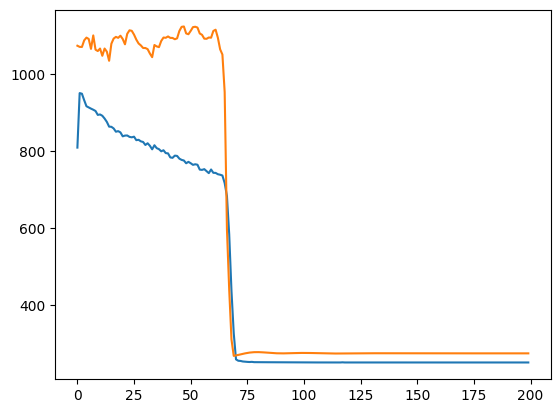

In [ ]:
plt.plot(h.history["loss"])
plt.plot(h.history["val_loss"])

# Y categorica

In [ ]:
!pip install keras-tuner

In [ ]:
import keras
from tensorflow.keras.layers import ConvLSTM1D, Dense, Conv2D, LSTM, GRU, Reshape, Dropout
from tensorflow.keras.layers import ConvLSTM2D, Conv3D, TimeDistributed, Flatten
from keras import regularizers

In [ ]:
X_DATA.shape

In [ ]:
Y_DATA_CATEGORICAL_SIMPLE.shape

In [ ]:
inputs = keras.Input(shape=(X_DATA.shape[1:]))
m = inputs
m = GRU(units=1)(m)

#m = Dense(units=2)(m)

m = Dropout(0.3)(m)
m = Flatten()(m)

m = Dense(Y_DATA_CATEGORICAL_SIMPLE.shape[1] * Y_DATA_CATEGORICAL_SIMPLE.shape[2] , activation='sigmoid')(m)
m = Reshape((Y_DATA_CATEGORICAL_SIMPLE.shape[1], Y_DATA_CATEGORICAL_SIMPLE.shape[2]))(m)

outputs = keras.layers.Activation(softmax_by_asset)(m)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    metrics=[],
  )

model.summary()

In [ ]:
h = model.fit(X_DATA,Y_DATA_CATEGORICAL_SIMPLE,epochs=200, batch_size=X_DATA.shape[0], validation_split = 0.3, shuffle=True)

In [ ]:
plt.plot(h.history["loss"])
plt.plot(h.history["val_loss"])

In [ ]:
np.argmax(Y_DATA_CATEGORICAL_SIMPLE[0:1], axis = -1)

In [ ]:
Y_DATA[0:1]

In [ ]:
pred = model(X_DATA[0:1])

In [ ]:
pred

In [ ]:
np.argmax(pred, axis = -1)

In [ ]:
!pip install -q -U keras-tuner
import kerastuner as kt

In [ ]:
import keras
import keras
from tensorflow.keras.layers import ConvLSTM1D, Dense, Conv2D, LSTM, GRU, Reshape, Dropout
from tensorflow.keras.layers import ConvLSTM2D, Conv3D, TimeDistributed, Flatten
from keras import regularizers

In [ ]:
def build_model_1(hp):

  n_units = hp.Int('n_units', min_value = 10, max_value = 100, step = 10)
  n_denses = hp.Choice('n_denses', values = [0,1,2,3 ])
  n_dropput = hp.Choice('n_dropput', values = [0.0, 0.2, 0.3,0.4, 0.5])
  n_l1 = hp.Choice('n_l1', values = [0.001, 0.0001,0.00001, 0.000001])
  n_l2 = hp.Choice('n_l2', values = [0.001, 0.0001,0.00001, 0.000001])
  last_layer_activation = hp.Choice('last_layer_activation', values = ['linear', 'relu', 'sigmoid','tanh'])
  n_learning_rate = hp.Choice('n_learning_rate', values = [0.01, 0.001,0.0001,])

  inputs = keras.Input(shape=(X_DATA.shape[1:]))
  m = inputs

  m = GRU(units=n_units,
                  kernel_regularizer=regularizers.l1_l2(l1=n_l1 , l2=n_l2 ))(m)

  m = keras.layers.Dropout(n_dropput)(m)

  for i in range(n_denses):
    m = Dense(units=n_units,
                    kernel_regularizer=regularizers.l1_l2(l1=n_l1 , l2=n_l2 ))(m)


  m = Flatten()(m)

  m = Dense(Y_DATA_CATEGORICAL.shape[1] * Y_DATA_CATEGORICAL.shape[1] , activation=last_layer_activation)(m)
  m = Reshape((Y_DATA_CATEGORICAL.shape[1], Y_DATA_CATEGORICAL.shape[1]))(m)

  outputs = keras.layers.Activation(softmax_by_asset)(m)

  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(
      loss='categorical_crossentropy',
      optimizer=keras.optimizers.Adam(learning_rate=n_learning_rate),
      metrics=['acc'],
    )

  return model



In [ ]:
tuner = kt.RandomSearch(build_model_1,
                        objective='val_acc',
                        max_trials=50,
                        executions_per_trial=3,)

In [ ]:
tuner.search_space_summary()

In [ ]:
tuner.search(X_DATA, Y_DATA_CATEGORICAL,
             epochs=50,
             validation_split = 0.3)

# INVERSION

In [84]:
import warnings
warnings.filterwarnings('ignore')

In [98]:
X_DATA[0:1].shape

(1, 149, 31)

In [108]:
d = data
d.shape

(150, 31)

In [109]:
d_log_returns = np.log(d).diff().dropna()
d_log_returns.shape

(149, 31)

In [110]:
d_log_returns = np.expand_dims(d_log_returns, axis=0)
d_log_returns.shape

(1, 149, 31)

In [118]:
activos_seleccionados= model_GRU(d_log_returns)
np.argsort(np.argsort(np.array(activos_seleccionados)[0]))

array([11,  6, 18, 26, 21,  8, 10, 16, 17, 28, 25, 27, 14, 23, 15, 13, 29,
        9,  3,  0, 22,  5, 24,  7, 12,  4, 30,  1,  2, 19, 20])

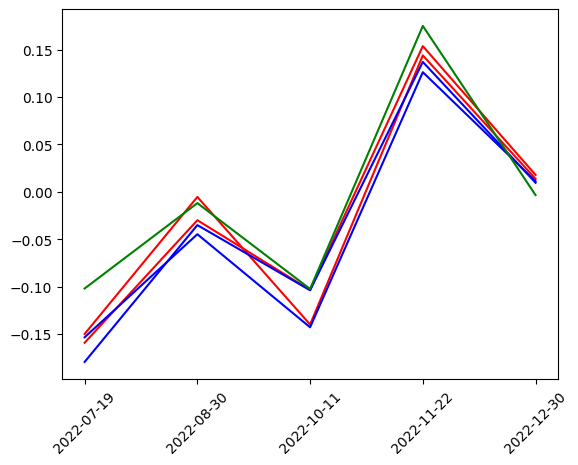

In [132]:


datos_analisis = adj_close[1500:]

days_backward = 150
days_forward = 30

n_activos_seleccionados = 10
num_portfolios = 10000

rendimientos = {}
rendimientos["rendimiento_algo_random_1"] = []
rendimientos["rendimiento_algo_random_2"] = []
rendimientos["rendimiento_algo_sharpe_1"] = []
rendimientos["rendimiento_algo_sharpe_2"] = []
rendimientos["rendimiento_algo_GRU_1"] = []

i = 0
n_i = 100


for i in range(days_backward, len(datos_analisis), days_forward):
  #print(i-90, i , i + days_forward )



  data = datos_analisis[i-days_backward:i]
  data_forward = datos_analisis[i:i+days_forward]

  # ALGO GRU
  d_log_returns = np.log(d).diff().dropna()
  d_log_returns = np.expand_dims(d_log_returns, axis=0)
  activos_seleccionados= model_GRU(d_log_returns)
  activos_seleccionados = np.argsort(np.argsort(np.array(activos_seleccionados)[0]))
  rendimiento = calcular_rendimiento(data, data_forward, activos_seleccionados)
  ## GUARDAMOS RENDIMIENTO
  rendimientos["rendimiento_algo_GRU_1"].append(rendimiento)


  # ALGO RANDOM
  activos_seleccionados= algo_random(n_activos_seleccionados, data.shape[1])
  rendimiento = calcular_rendimiento(data, data_forward, activos_seleccionados)
  ## GUARDAMOS RENDIMIENTO
  rendimientos["rendimiento_algo_random_1"].append(rendimiento)

  # ALGO RANDOM
  activos_seleccionados= algo_random(n_activos_seleccionados, data.shape[1])
  rendimiento = calcular_rendimiento(data, data_forward, activos_seleccionados)
  ## GUARDAMOS RENDIMIENTO
  rendimientos["rendimiento_algo_random_2"].append(rendimiento)

  ####

  # ALGO SHARPE
  activos_seleccionados= algo_sharpe(data, n_activos_top = n_activos_seleccionados)
  rendimiento = calcular_rendimiento(data, data_forward, activos_seleccionados)
  ## GUARDAMOS RENDIMIENTO
  rendimientos["rendimiento_algo_sharpe_1"].append(rendimiento)

  # ALGO SHARPE
  activos_seleccionados= algo_sharpe(data, n_activos_top = n_activos_seleccionados)
  rendimiento = calcular_rendimiento(data, data_forward, activos_seleccionados)
  ## GUARDAMOS RENDIMIENTO
  rendimientos["rendimiento_algo_sharpe_2"].append(rendimiento)



days = []
for i in range(days_backward, len(datos_analisis), days_forward):
  data = datos_analisis[i-days_backward:i]
  data_forward = datos_analisis[i:i+days_forward]
  days.append(data_forward.index[-1].date())

days = np.array(days)


plt.plot(np.array(rendimientos["rendimiento_algo_random_1"]),   color = 'r');
plt.plot(np.array(rendimientos["rendimiento_algo_random_2"]),   color = 'r');
plt.plot(np.array(rendimientos["rendimiento_algo_sharpe_1"]),   color = 'b');
plt.plot(np.array(rendimientos["rendimiento_algo_sharpe_2"]),   color = 'b');
plt.plot(np.array(rendimientos["rendimiento_algo_GRU_1"]),   color = 'g');
plt.xticks(np.arange(len(days)), days, rotation=45);


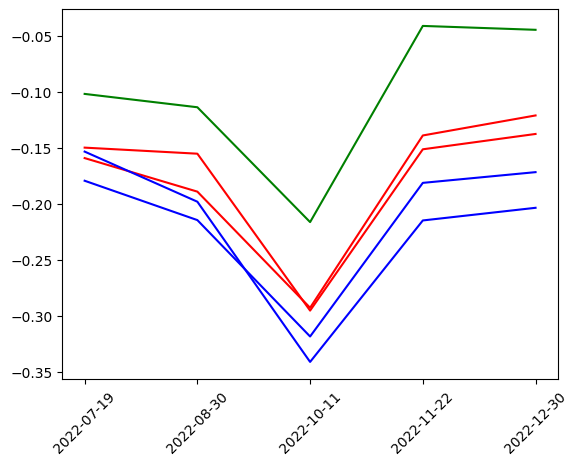

In [133]:
plt.plot(np.array(rendimientos["rendimiento_algo_random_1"]).cumsum(),   color = 'r');
plt.plot(np.array(rendimientos["rendimiento_algo_random_2"]).cumsum(),   color = 'r');
plt.plot(np.array(rendimientos["rendimiento_algo_sharpe_1"]).cumsum(),   color = 'b');
plt.plot(np.array(rendimientos["rendimiento_algo_sharpe_2"]).cumsum(),   color = 'b');
plt.plot(np.array(rendimientos["rendimiento_algo_GRU_1"]).cumsum(),   color = 'g');
plt.xticks(np.arange(len(days)), days, rotation=45);